# Import necessary libraries

In [26]:
import pandas as pd

# import warnings
# warnings.filterwarnings("ignore")

# Import Dataset

In [27]:
df = pd.read_csv('diabetes_data_upload.csv')
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


# Dataset Preprocessing

In [28]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [29]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


# Turning each factor and convert it into binary operators

In [30]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for n in df.columns:
    if n != "Age":
        le.fit(df[n])
        df[n] = le.transform(df[n])


# Reading the correlation between the features and its correlation to its result

In [31]:
df.corr(method='pearson')

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
Age,1.000000,0.062872,0.199781,0.137382,0.064808,0.224596,0.315577,0.096519,0.402729,0.296559,0.201625,0.257501,0.232742,0.307703,0.321691,0.140458,0.108679
Gender,0.062872,1.000000,-0.268894,-0.312262,-0.281840,-0.124490,-0.219968,0.208961,-0.208092,-0.052496,-0.013735,-0.101978,-0.332288,-0.090542,0.327871,-0.005396,-0.449233
Polyuria,0.199781,-0.268894,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922
Polydipsia,0.137382,-0.312262,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734
sudden weight loss,0.064808,-0.281840,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568
weakness,0.224596,-0.124490,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,0.243275
Polyphagia,0.315577,-0.219968,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,0.342504
Genital thrush,0.096519,0.208961,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,0.110288
visual blurring,0.402729,-0.208092,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300
Itching,0.296559,-0.052496,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,-0.013384


# Splitting dataset

In [32]:
# from scipy.stats import mode
# from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# df.corr(method = 'pearson')

features = df.drop(columns=['class']).values
target = df['class'].values
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=12, stratify=target)

# features_train, features_test, target_train, target_test

# Reduce the model

Reducing the model with anything that has an absolute value less than 0.25

In [33]:
df2 = df
foo = df2.corr(method = 'pearson')
for i in foo:
    corr_to_class = foo['class'][i]
    if (abs(corr_to_class) < 0.25):
        df2 = df2.drop([i], axis=1)
df2

,Gender,Polyuria,Polydipsia,sudden weight loss,Polyphagia,visual blurring,Irritability,partial paresis,Alopecia,class
0,1,0,1,0,0,0,0,0,1,1
1,1,0,0,0,0,1,0,1,1,1
2,1,1,0,0,1,0,0,0,1,1
3,1,0,0,1,1,0,0,0,0,1
4,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
515,0,1,1,1,1,0,0,1,0,1
516,0,1,1,1,1,0,1,1,0,1
517,0,1,1,1,1,1,0,1,0,1
518,0,0,0,0,0,1,0,0,1,0


# Split the reduced dataset

In [34]:
features2 = df2.drop(columns=['class']).values
target2 = df['class'].values
features_train2, features_test2, target_train2, target_test2 = train_test_split(features2, target2, test_size=0.2, random_state=12, stratify=target2)

# features_train2, features_test2, target_train2, target_test2

# Model 1: Decision Tree

In [35]:
from sklearn import tree

# Regular model
model1 = tree.DecisionTreeClassifier(criterion='entropy')
model1.fit(features_train, target_train)


# Reduced model
r_model1 = tree.DecisionTreeClassifier(criterion='entropy')
r_model1.fit(features_train2, target_train2)

DecisionTreeClassifier(criterion='entropy')

In [36]:
import pickle
filename = 'finalized_model_M1.model' 
pickle.dump(model1, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
r1_result = loaded_model.score(features_test, target_test)
print(r1_result)


0.9519230769230769


In [37]:
filename = 'finalized_reduced_model_M1.model' 
pickle.dump(r_model1, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
r1r_result = loaded_model.score(features_test2, target_test2)
print(r1r_result)

0.9134615384615384


# Model 2: Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
model2=LogisticRegression()
r_model2=LogisticRegression()
model2.fit(features_train,target_train)
r_model2.fit(features_train2, target_train2)
print("Train_score    :",model2.score(features_train,target_train)*100)
print("Test_score     :",model2.score(features_test,target_test)*100)
print("Reduced Model")
print("Train_score    :",r_model2.score(features_train2,target_train2)*100)
print("Test_score     :",r_model2.score(features_test2,target_test2)*100)

Train_score    : 93.26923076923077
Test_score     : 91.34615384615384
Reduced Model
Train_score    : 90.38461538461539
Test_score     : 88.46153846153845


In [39]:
filename = 'finalized_model_M2.model' 
pickle.dump(model2, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
r2_result = loaded_model.score(features_test, target_test)
print(r2_result)

0.9134615384615384


In [40]:
filename = 'finalized_reduced_model_M2.model' 
pickle.dump(r_model2, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
r2r_result = loaded_model.score(features_test2, target_test2)
print(r2r_result)

0.8846153846153846


# Model 3: Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(features_train,target_train)
r_model3 = GaussianNB()
r_model3.fit(features_train2,target_train2)

GaussianNB()

In [42]:
filename = 'finalized_model_M3.model' 
pickle.dump(model3, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
r3_result = loaded_model.score(features_test, target_test)
print(r3_result)

0.8461538461538461


In [43]:
filename = 'finalized_reduced_model_M3.model' 
pickle.dump(r_model3, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
r3r_result = loaded_model.score(features_test2, target_test2)
print(r3r_result)

0.875


# Model 4: Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(max_depth=7, random_state=0)
model4.fit(features_train,target_train)
r_model4 = RandomForestClassifier(max_depth=7, random_state=0)
r_model4.fit(features_train2,target_train2)

RandomForestClassifier(max_depth=7, random_state=0)

In [45]:
filename = 'finalized_model_M4.model' 
pickle.dump(model4, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
r4_result = loaded_model.score(features_test, target_test)
print(r4_result)

0.9615384615384616


In [46]:
filename = 'finalized_reduced_model_M4.model' 
pickle.dump(r_model4, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
r4r_result = loaded_model.score(features_test2, target_test2)
print(r4r_result)

0.9423076923076923


# Evaluation

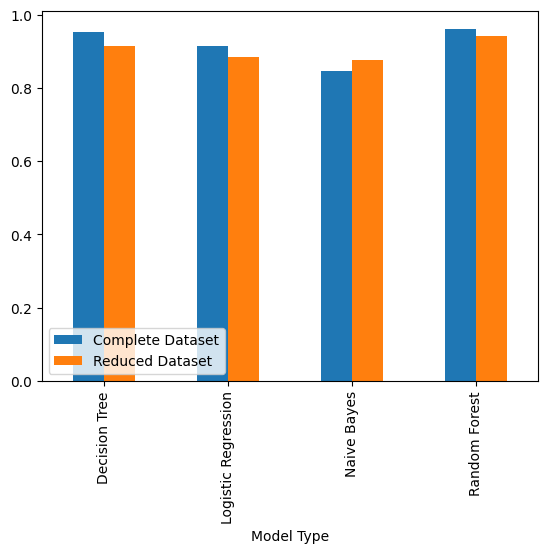

In [47]:
import matplotlib.pyplot as mp
data = [["Decision Tree", r1_result, r1r_result], ["Logistic Regression", r2_result, r2r_result], ["Naive Bayes", r3_result, r3r_result], ["Random Forest", r4_result, r4r_result]]
df = pd.DataFrame(data, columns=['Model Type', 'Complete Dataset', 'Reduced Dataset'])
df.plot(x="Model Type", y=["Complete Dataset", "Reduced Dataset"], kind="bar")
mp.legend(loc='lower left')

## Analysis
From this graph we are able to see that Random Forest has the best results with an accuraccy of 96.15%. We were supprised that reducing the features did not seem to improve the models except for Naive Bayes in which it increased the accuracy by about 3%. The following are the classification reports and confusion matrices for each model.

### Decision Tree

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        40
           1       0.98      0.94      0.96        64

    accuracy                           0.95       104
   macro avg       0.95      0.96      0.95       104
weighted avg       0.95      0.95      0.95       104



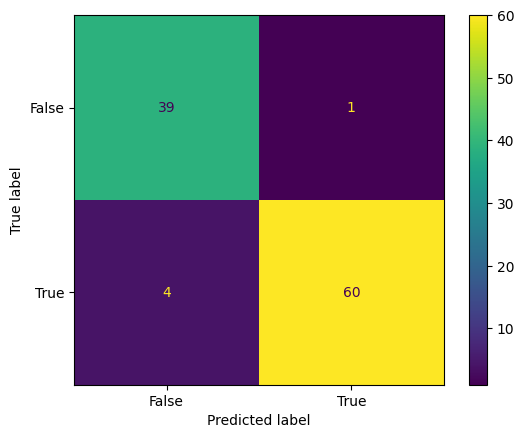

In [57]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_predict = model1.predict(features_test)
print(classification_report(target_test, y_predict))

confusion_matrix = confusion_matrix(target_test, y_predict)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

### Reduced Features Decision tree

              precision    recall  f1-score   support

           0       0.84      0.95      0.89        40
           1       0.97      0.89      0.93        64

    accuracy                           0.91       104
   macro avg       0.91      0.92      0.91       104
weighted avg       0.92      0.91      0.91       104



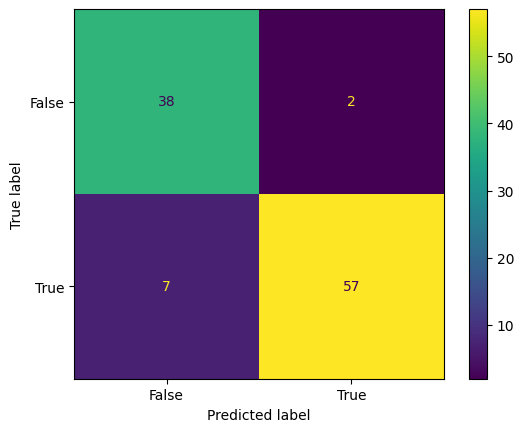

In [58]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict = r_model1.predict(features_test2)
print(classification_report(target_test2, y_predict))

confusion_matrix = confusion_matrix(target_test, y_predict)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()


### Logistic Regression

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.94      0.92      0.93        64

    accuracy                           0.91       104
   macro avg       0.91      0.91      0.91       104
weighted avg       0.91      0.91      0.91       104



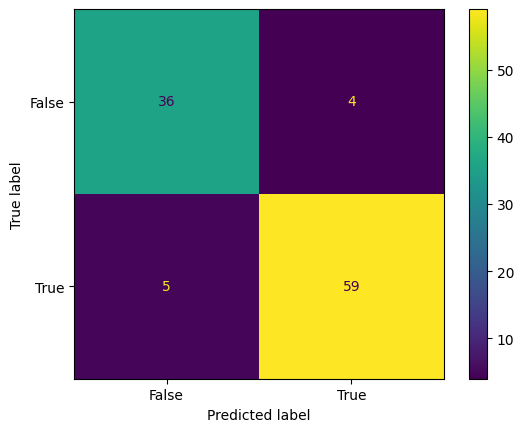

In [59]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict = model2.predict(features_test)
print(classification_report(target_test, y_predict))

confusion_matrix = confusion_matrix(target_test, y_predict)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

### Reduced Features Logistic Regression

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        40
           1       0.91      0.91      0.91        64

    accuracy                           0.88       104
   macro avg       0.88      0.88      0.88       104
weighted avg       0.88      0.88      0.88       104



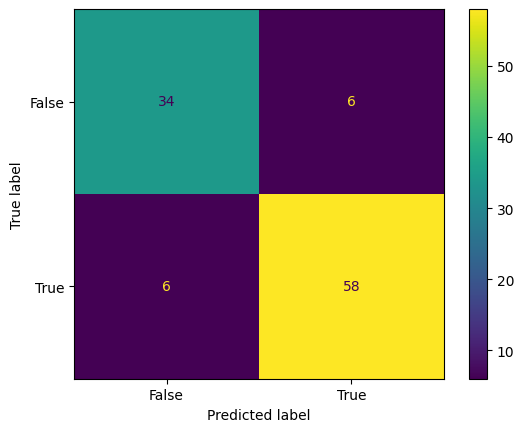

In [60]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict = r_model2.predict(features_test2)
print(classification_report(target_test2, y_predict))

confusion_matrix = confusion_matrix(target_test, y_predict)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

### Naive Bayes

              precision    recall  f1-score   support

           0       0.79      0.82      0.80        40
           1       0.89      0.86      0.87        64

    accuracy                           0.85       104
   macro avg       0.84      0.84      0.84       104
weighted avg       0.85      0.85      0.85       104



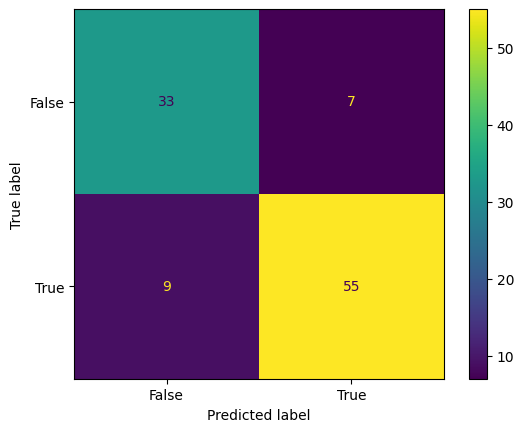

In [61]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict = model3.predict(features_test)
print(classification_report(target_test, y_predict))

confusion_matrix = confusion_matrix(target_test, y_predict)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

This is our worst performing model with 7 false negatives and 9 false positives.

### Reduced Features Naive Bayes

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        40
           1       0.90      0.89      0.90        64

    accuracy                           0.88       104
   macro avg       0.87      0.87      0.87       104
weighted avg       0.88      0.88      0.88       104



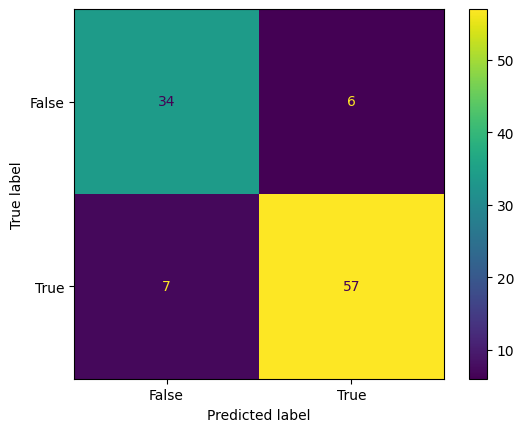

In [62]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict = r_model3.predict(features_test2)
print(classification_report(target_test2, y_predict))

confusion_matrix = confusion_matrix(target_test, y_predict)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

### Random Forest

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        40
           1       0.98      0.95      0.97        64

    accuracy                           0.96       104
   macro avg       0.96      0.96      0.96       104
weighted avg       0.96      0.96      0.96       104



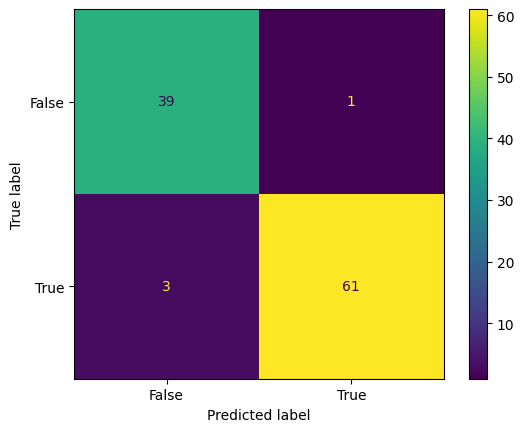

In [63]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict = model4.predict(features_test)
print(classification_report(target_test, y_predict))

confusion_matrix = confusion_matrix(target_test, y_predict)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

This is the best performing model with only 1 false negative and 3 false positives.

### Reduced Features Random Forest

              precision    recall  f1-score   support

           0       0.90      0.95      0.93        40
           1       0.97      0.94      0.95        64

    accuracy                           0.94       104
   macro avg       0.94      0.94      0.94       104
weighted avg       0.94      0.94      0.94       104



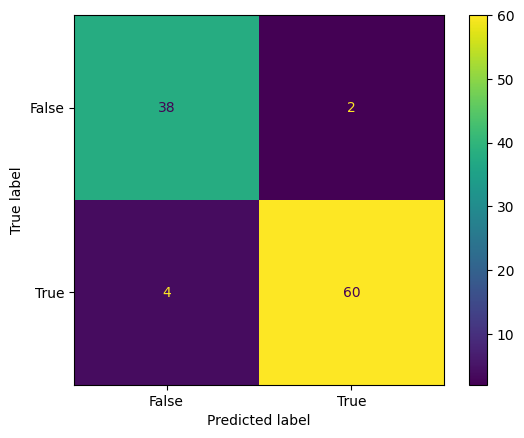

In [64]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict = r_model4.predict(features_test2)
print(classification_report(target_test2, y_predict))

confusion_matrix = confusion_matrix(target_test, y_predict)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()